In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import babel.numbers
import locale 
from datetime import datetime

In [2]:
demographics_nash = pd.read_excel("data/demographics.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)

In [3]:
demographics_nash.head()

Unnamed: 0_level_0 United States        Tennessee        37013        37015  \
  Unnamed: 0_level_1         Value  Error     Value Error  Value Error  Value   
0             Total:     324697795      0   6709356     0  97939  2456  17665   
1              Male:     159886919   5817   3273278  1507  47658  1617   9112   
2      Under 5 years      10112614   3826    208598   796   4550   514    527   
3       5 to 9 years      10276829  16598    209037  2400   3786   510    681   
4     10 to 14 years      10708022  16572    219974  2346   3656   554    604   

         37027  ...  37221       37228       37240       37243       37246  \
  Error  Value  ...  Value Error Value Error Value Error Value Error Value   
0   734  56117  ...  41017  1119  1615   363   796   147     0    12     0   
1   483  27888  ...  19437   767   708   284   332    87     0    12     0   
2   138   1561  ...   1508   289     0    12     0    12     0    12     0   
3   159   2093  ...   1354   231     0    12     0    12     0    12     0   
4   137   2511  ...   1002   214     0    12     0    12     0    12     0   

         
  Error  
0    12  
1    12  
2    12  
3    12  
4    12  

[5 rows x 89 columns]

In [4]:
demographics_nash = demographics_nash[demographics_nash.columns.drop(list(demographics_nash.filter(regex='Error')))]

In [5]:
demographics_nash.columns = demographics_nash.columns.droplevel(1)

In [6]:
demographics_nash

,Unnamed: 0_level_0,United States,Tennessee,37013,37015,37027,37062,37064,37072,37073,...,37216,37217,37218,37219,37220,37221,37228,37240,37243,37246
0,Total:,324697795,6709356,97939,17665,56117,12185,58937,31492,14785,...,17848,30146,15721,1154,5880,41017,1615,796,0,0
1,Male:,159886919,3273278,47658,9112,27888,5990,27951,15327,7373,...,8877,15018,7083,737,2994,19437,708,332,0,0
2,Under 5 years,10112614,208598,4550,527,1561,232,1803,881,440,...,435,1348,324,0,315,1508,0,0,0,0
3,5 to 9 years,10276829,209037,3786,681,2093,349,1838,1131,697,...,421,1035,462,0,283,1354,0,0,0,0
4,10 to 14 years,10708022,219974,3656,604,2511,536,2229,950,569,...,240,704,441,0,177,1002,0,0,0,0
5,15 to 17 years,6429069,131597,1727,371,1771,362,1232,529,315,...,190,487,391,0,77,730,0,0,0,0
6,18 and 19 years,4411135,86975,1107,203,673,251,790,301,272,...,242,432,166,0,20,294,28,181,0,0
7,20 years,2352092,47118,210,111,179,171,475,195,76,...,17,102,26,0,0,111,16,108,0,0
8,21 years,2303286,46308,620,27,263,67,210,312,0,...,60,136,55,0,0,104,4,43,0,0
9,22 to 24 years,6639841,132886,2842,393,1177,293,743,497,210,...,316,533,160,201,22,874,200,0,0,0


In [7]:
demographics_nash = demographics_nash.set_index('Unnamed: 0_level_0').T.reset_index().rename({"index": "zipcode"}, axis = 1)

In [8]:
demographics_nash

Unnamed: 0_level_0,zipcode,Total:,Male:,Under 5 years,5 to 9 years,10 to 14 years,15 to 17 years,18 and 19 years,20 years,21 years,...,50 to 54 years,55 to 59 years,60 and 61 years,62 to 64 years,65 and 66 years,67 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over
0,United States,324697795,159886919,10112614,10276829,10708022,6429069,4411135,2352092,2303286,...,10850737,11143260,4370261,6096664,3743900,5151607,6843745,4929902,3525274,4070765
1,Tennessee,6709356,3273278,208598,209037,219974,131597,86975,47118,46308,...,229902,237175,91565,130200,78823,112465,152048,106536,74070,76559
2,37013,97939,47658,4550,3786,3656,1727,1107,210,620,...,2899,2785,1236,1286,871,757,1019,571,315,233
3,37015,17665,9112,527,681,604,371,203,111,27,...,752,825,185,331,280,266,480,256,212,110
4,37027,56117,27888,1561,2093,2511,1771,673,179,263,...,2043,2311,770,1086,786,892,1145,748,538,280
5,37062,12185,5990,232,349,536,362,251,171,67,...,440,391,182,247,122,191,197,217,106,50
6,37064,58937,27951,1803,1838,2229,1232,790,475,210,...,2232,2365,998,1166,798,731,1279,816,590,769
7,37072,31492,15327,881,1131,950,529,301,195,312,...,1419,1283,594,379,403,668,814,596,333,478
8,37073,14785,7373,440,697,569,315,272,76,0,...,528,479,160,321,134,149,339,290,120,130
9,37075,65986,31603,2188,2046,2242,1619,819,184,478,...,2466,2288,725,1406,843,1018,1398,874,663,725


In [9]:
demographics_nash.to_csv('demographics_nash_clean.csv')

In [10]:
building_permits = pd.read_csv('data/Building_Permits_Issued.csv')

C:\Users\Cristian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
building_permits.head()

,permit#,permit_type_description,permit_subtype_description,parcel,date_entered,date_issued,construction_cost,address,city,state,zip,subdivision/lot,contact,permit_type,permit_subtype,IVR_tracking#,purpose,council_district,census_tract,mapped_location
0,2021021204,Building Residential - New,Single Family Residence,7112039200,4/7/2021,5/5/2021,292188.0,1807 JOY CIR,NASHVILLE,TN,3720.0,LOT 54 JOYWOOD SUB,HARP DEVELOPMENT LLC,CARN,CAA01R301,3963014,to construct a single family residence with 24...,5.0,37011300.0,"1807 JOY CIR\nNASHVILLE, TN 03720\n(36.202582,..."
1,2021027119,Building Sign Permit,Sign - Ground / Wall Signs,10701000100,4/30/2021,5/5/2021,5000.0,1717 ELM HILL PIKE,NASHVILLE,TN,37210.0,LOT 44 REV SEC 36 & 19 METRO IND PARK,BOOM SIGN AND LIGHTING,CASN,CAZ02A001,3976785,to erect 57SF illuminated monument sign for Th...,15.0,37019600.0,"1717 ELM HILL PIKE\nNASHVILLE, TN 37210\n(36.1..."
2,2021019617,Building Demolition Permit,Demolition Permit - Commercial,10509010400,4/1/2021,5/5/2021,19000.0,1407 CALDWELL AVE,NASHVILLE,TN,37212.0,LOT 47 BLAKEMORE SUB LAWRENCE & PT CLSD R.O.W.,DEM TEC INC,CADM,CAZ01A002,3959330,to demolish existing structure. RM20 Zoning. ...,18.0,37017000.0,"1407 CALDWELL AVE\nNASHVILLE, TN 37212\n(36.13..."
3,2021008837,Building Commercial - Rehab,"Automobile Sales, Used",2612000400,2/10/2021,5/5/2021,1010013.0,2353 GALLATIN PIKE N,MADISON,TN,37115.0,LOT 1 CARMAX AUTO SUPERSTORE,"GRACE, THOMAS CONSTRUCTION INC",CACR,CAF26S001,3924533,Rehab existing CARMAX. Architectural - Partial...,10.0,37010401.0,"2353 GALLATIN PIKE N\nMADISON, TN 37115\n(36.3..."
4,2021018673,Building Sign Permit,Sign - Ground / Wall Signs,9100004700,3/29/2021,5/5/2021,5400.0,4717 CENTENNIAL BLVD,NASHVILLE,TN,37209.0,S/S JOHN A. MERRITT BV E OF 49TH AVE NO,BOZMAN SIGN CO INC,CASN,CAZ02A001,3956834,"Install a 56 SF illuminated wall sign, BROADST...",20.0,37013300.0,"4717 CENTENNIAL BLVD\nNASHVILLE, TN 37209\n(36..."


In [12]:
building_permits = building_permits.drop(columns=['parcel','permit_type','permit_subtype','IVR_tracking#', 'census_tract', 'mapped_location'])

In [13]:
building_permits['permit_type_description'].value_counts()

Building Residential - New                  13024
Building Residential - Addition              3321
Building Commercial - Rehab                  3039
Building Residential - Rehab                 3026
Building Demolition Permit                   2788
Building Sign Permit                         2384
Building Use & Occupancy                     1611
Building Commercial - Tenant Finish Out      1534
Building Commercial - New                    1180
Building Tree Removal Permit                  501
Building Residential Rehab Storm Damage       232
Building Residential - Roofing / Siding       206
Building Commercial - Shell                   201
Building Commercial - Addition                182
Building Commercial - Roofing / Siding        172
Building Commercial - Foundation              162
Building Commercial Rehab Storm Damage        136
Building Residential - Tenant Finish Out       89
Building Demolition Storm Damage               88
Building Residential New Storm Damage          83


In [14]:
pd.set_option('display.max_rows', 500)
building_permits['permit_subtype_description'].value_counts()

Single Family Residence                     14871
Demolition Permit - Residential              2374
Sign - Ground /  Wall Signs                  2270
Multifamily, Townhome                        1838
General Office, Professional Services        1220
Accessory Structure, Garage                  1154
Multifamily, Condominium > 5 Unit Bldg        936
Multifamily, Tri-Plex, Quad, Apartments       848
Accessory Structure, Pools - Residential      846
Accessory Structure, Decks                    798
Retail, Department / Retail Stores            605
Accessory Structure, Shed / Storage Bldg      557
Tree Removal Permit                           494
Demolition Permit - Commercial                457
Multifamily, Apt / Twnhome > 5 Unit Bldg      444
Restaurant (Full Service)                     391
Duplex                                        361
Accessory Structure, Carport                  306
Warehouse, Storage S-1                        292
Medical Office, Professional Services         270


In [15]:
town_home = building_permits.permit_subtype_description.isin(['Multifamily, Townhome','Multifamily, Condominium > 5 Unit Bldg','Multifamily, Tri-Plex, Quad, Apartments','Multifamily, Apt / Twnhome > 5 Unit Bldg','Duplex'])

In [16]:
multi_family_res = building_permits[building_permits.permit_subtype_description == 'Multifamily, Townhome']
multi_family_res = building_permits[building_permits.permit_subtype_description == 'Multifamily, Condominium > 5 Unit Bldg']
multi_family_res = building_permits[building_permits.permit_subtype_description == 'Multifamily, Tri-Plex, Quad, Apartments']
multi_family_res = building_permits[building_permits.permit_subtype_description == 'Multifamily, Apt / Twnhome > 5 Unit Bldg']
multi_family_res = building_permits[building_permits.permit_subtype_description == 'Duplex']                                  

In [17]:
multi_family_res = multi_family_res.reset_index()
multi_family_res = multi_family_res.drop(columns='index')

In [18]:
multi_family_res = multi_family_res[multi_family_res.zip != 27218]
multi_family_res = multi_family_res[multi_family_res.zip != 37127]
multi_family_res = multi_family_res[multi_family_res.zip != 37202]

In [19]:
multi_family_res

,permit#,permit_type_description,permit_subtype_description,date_entered,date_issued,construction_cost,address,city,state,zip,subdivision/lot,contact,purpose,council_district
0,2021013289,Building Residential - New,Duplex,3/5/2021,5/6/2021,349171.0,712 47TH AVE N,NASHVILLE,TN,37209.0,UNIT A 712 47TH AVENUE NORTH,"SAPPHIRE DEVELOPMENT, LLC",To construct ...Unit A� of HPR detached duplex...,20.0
1,2021013302,Building Residential - New,Duplex,3/5/2021,5/6/2021,349656.0,4607 INDIANA AVE,NASHVILLE,TN,37209.0,UNIT B 712 47TH AVENUE NORTH,"SAPPHIRE DEVELOPMENT, LLC",To construct ...Unit B� of HPR detached duplex...,20.0
2,2021026248,Building Residential - Rehab,Duplex,4/27/2021,5/6/2021,50000.0,4157 APACHE TRL,ANTIOCH,TN,37013.0,LOT 198 HAYWOOD HILLS SEC. 3,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,to conduct interior and exterior renovations t...,30.0
3,2021013702,Building Residential - New,Duplex,3/8/2021,5/6/2021,291000.0,407B S 10TH ST,NASHVILLE,TN,37206.0,UNIT B 407 SOUTH 10TH STREET COTTAGES,TOUCHSTONE BUILDERS INC,This permit to construct 407 S. 10th street un...,6.0
4,2021025566,Building Residential - New,Duplex,4/25/2021,5/7/2021,230114.0,1704 MCKINNEY AVE,NASHVILLE,TN,37208.0,UNIT 2 1700 MCKINNEY AVENUE TOWNHOMES,"JONES CONSTRUCTION, DWAYNE MARK JONES DBA",to construct Unit 2 of an attached duplex sing...,2.0
5,2021025565,Building Residential - New,Duplex,4/25/2021,5/7/2021,227204.0,1706 MCKINNEY AVE,NASHVILLE,TN,37208.0,UNIT 1 1700 MCKINNEY AVENUE TOWNHOMES,"JONES CONSTRUCTION, DWAYNE MARK JONES DBA",to construct Unit 1 of an attached duplex sing...,2.0
6,2021025568,Building Residential - New,Duplex,4/25/2021,5/7/2021,230114.0,1700 MCKINNEY AVE,NASHVILLE,TN,37208.0,UNIT 4 1700 MCKINNEY AVENUE TOWNHOMES,"JONES CONSTRUCTION, DWAYNE MARK JONES DBA",to construct Unit 4 of an attached duplex sing...,2.0
7,2021025567,Building Residential - New,Duplex,4/25/2021,5/7/2021,227204.0,1702 MCKINNEY AVE,NASHVILLE,TN,37208.0,UNIT 3 1700 MCKINNEY AVENUE TOWNHOMES,"JONES CONSTRUCTION, DWAYNE MARK JONES DBA",to construct Unit 3 of an attached duplex sing...,2.0
8,2021016237,Building Residential - New,Duplex,3/17/2021,5/10/2021,242480.0,2123B 12TH AVE N,NASHVILLE,TN,37208.0,UNIT B TWENTYONE-TWENTYTHREE TWELFTH AVENUE NORTH,"JACKSON BUILDERS,LLC",To construct ...Unit B� of HPR attached duplex...,2.0
9,2021015462,Building Residential - New,Duplex,3/15/2021,5/3/2021,539033.0,1307 CLIFTON LN,NASHVILLE,TN,37215.0,UNIT A 1307 CLIFTON LANE HOMES,PAROS GROUP LLC,To construct ...Unit A� of HPR detached duplex...,25.0


In [20]:
multi_family_res['zip'] = multi_family_res['zip'].astype(int) 
multi_family_res['construction_cost'] = multi_family_res['construction_cost'].astype(int)  

In [21]:
multi_family_res.to_csv('multi_family_homes')

In [22]:
building_permits['zip'].value_counts()

37209.0    3856
37013.0    3401
37203.0    2456
37206.0    2294
37207.0    2257
37208.0    1973
37211.0    1903
37205.0    1344
37215.0    1326
37076.0    1274
37214.0    1194
37216.0    1156
37115.0    1067
37212.0    1042
37210.0    1002
37221.0     957
37204.0     893
37138.0     793
37217.0     716
37027.0     569
37218.0     564
37135.0     561
37201.0     354
37219.0     263
37220.0     212
37228.0     199
37080.0     187
37072.0     160
37189.0     131
37213.0      57
37086.0      27
37122.0      25
37143.0      18
0.0          13
37015.0      13
37238.0      11
37064.0      10
37232.0       4
301.0         1
27218.0       1
37202.0       1
3720.0        1
37127.0       1
Name: zip, dtype: int64

In [23]:
building_permits['date_entered'].value_counts()

8/21/2019     99
2/25/2020     98
9/28/2020     96
12/3/2020     90
10/27/2020    85
              ..
3/21/2020      1
12/28/2017     1
1/19/2020      1
9/1/2017       1
5/23/2020      1
Name: date_entered, Length: 1073, dtype: int64

In [24]:
building_permits.dtypes

permit#                        object
permit_type_description        object
permit_subtype_description     object
date_entered                   object
date_issued                    object
construction_cost             float64
address                        object
city                           object
state                          object
zip                           float64
subdivision/lot                object
contact                        object
purpose                        object
council_district              float64
dtype: object

In [25]:
#building_permits = pd.building_permits({"permit_type_description":["Building Residential - New"], "permit_subtype_description":['Single Family Residence','Multifamily, Townhome']})
#building_permits.permit_type_description = building_permits.permit_type_descriptio.astype("list")
#building_permits

In [26]:
#dict = {'permit_type_description':["Building Residential - New"]}
  
# converting the dictionary to a dataframe
#building_pemits = pd.building_permits.from_dict(dict)
  
# storing lastname of each person
#building_permits['Single Family Residence'] = building_permits.permit_type_description.str.extract('Building Residential - New', expand = True)

In [27]:
#building_permits.drop(["Building Residential - Addition"], inplace = True)

In [28]:
#residential_permits = building_permits[(building_permits.permit_type_description= 'Building Residential - New')]

In [29]:
#residential_building= building_permits[building_permits.permit_type_description != 'Building Residential - Addition']
#residential_building

In [30]:
residential_permits = building_permits[building_permits['permit_type_description'] == 'Building Residential - New']
residential_permits

,permit#,permit_type_description,permit_subtype_description,date_entered,date_issued,construction_cost,address,city,state,zip,subdivision/lot,contact,purpose,council_district
0,2021021204,Building Residential - New,Single Family Residence,4/7/2021,5/5/2021,292188.0,1807 JOY CIR,NASHVILLE,TN,3720.0,LOT 54 JOYWOOD SUB,HARP DEVELOPMENT LLC,to construct a single family residence with 24...,5.0
6,2021015956,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,219687.0,732 INSPIRATION BLVD 1,MADISON,TN,37115.0,UNIT 732 UNIT 1 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1812Sf single family residence wi...,8.0
12,2021015968,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,219687.0,718 INSPIRATION BLVD,MADISON,TN,37115.0,UNIT 718 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1812Sf single family residence wi...,8.0
17,2021015996,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,174343.0,712 INSPIRATION BLVD,MADISON,TN,37115.0,UNIT 712 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1438Sf single family residence wi...,8.0
20,2021015990,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,174343.0,732 INSPIRATION BLVD 2,MADISON,TN,37115.0,UNIT 732 UNIT 2 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1438Sf single family residence wi...,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34273,2020009574,Building Residential - New,Single Family Residence,2/12/2020,2/21/2020,202770.0,2396 UNA ANTIOCH PIKE,ANTIOCH,TN,37013.0,LOT 4 2410 UNA ANTIOCH PIKE,"DESTINY ENTERPRISES, LLC",TO CONSTRUCT A SINGLE-FAMILY RESIDENCE WITH 18...,28.0
34274,2019069930,Building Residential - New,Single Family Residence,11/14/2019,11/20/2019,190379.0,613 ANNEX AVE,NASHVILLE,TN,37209.0,UNIT A 613 ANNEX AVENUE TOWNHOMES,TIMO6 LLC,"parent parcel is map 90-8 parcel 31, is zoned ...",20.0
34275,2020040538,Building Residential - New,Single Family Residence,6/30/2020,9/8/2020,2442157.0,4809 POST RD,NASHVILLE,TN,37205.0,LOT 78 HILL PLACE REV,"Castle Contractors, LLC",New Single Family Residence on Existing Reside...,23.0
34279,2020079583,Building Residential - New,Single Family Residence,12/22/2020,2/4/2021,230356.0,1622B CAHAL AVE,NASHVILLE,TN,37206.0,UNIT 1622B 1622 CAHAL AVENUE,"APS CONTRACTORS, LLC","parent parcel is map 72-14 parcel 294, is zone...",7.0


In [31]:
residential_permits['date_issued'].value_counts()

5/27/2021     65
5/17/2021     64
9/13/2018     60
3/10/2021     57
6/25/2019     53
              ..
10/12/2018     1
12/12/2019     1
12/21/2018     1
1/24/2021      1
2/16/2021      1
Name: date_issued, Length: 761, dtype: int64

In [32]:
#residential_permits = residential_permits.drop(columns=['parcel','permit_type','permit_subtype','IVR_tracking#', 'census_tract', 'mapped_location'])

In [33]:
residential_permits['zip'].value_counts()

37013.0    2248
37209.0    1976
37207.0    1143
37208.0     903
37206.0     769
37076.0     652
37135.0     466
37138.0     464
37216.0     411
37211.0     396
37205.0     338
37215.0     327
37203.0     325
37221.0     320
37115.0     308
37204.0     279
37027.0     253
37218.0     250
37210.0     249
37212.0     247
37214.0     226
37217.0     167
37080.0     115
37072.0      72
37189.0      48
37220.0      42
37064.0       7
37122.0       7
37143.0       6
37015.0       6
37202.0       1
37127.0       1
3720.0        1
27218.0       1
Name: zip, dtype: int64

In [34]:
#residential_permits['zip'] = residential_permits['zip'].astype(float)          
#residential_permits['zip'] = residential_permits['zip'].float.replace('.', ' ')

In [35]:
##residential_permits.drop(["3720.0"], inplace = True)

In [36]:
#residential_permits.drop(residential_permits.index[(residential_permits["zip"] == "3720.0")],axis=9,inplace=true)

In [37]:
#residential_permits[(residential_permits.zip != "3720.0")

In [38]:
#residential_permits.drop(labels=["3720.0", "27218.0"],axis="zip")

In [39]:
residential_permits['zip'] = residential_permits['zip'].astype(int) 
residential_permits['construction_cost'] = residential_permits['construction_cost'].astype(int)          
#residential_permits['zip'] = residential_permits['zip'].int.replace('.0', '')

<ipython-input-39-57c93a96d2f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_permits['zip'] = residential_permits['zip'].astype(int)
<ipython-input-39-57c93a96d2f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_permits['construction_cost'] = residential_permits['construction_cost'].astype(int)


In [40]:
residential_permits.head()

,permit#,permit_type_description,permit_subtype_description,date_entered,date_issued,construction_cost,address,city,state,zip,subdivision/lot,contact,purpose,council_district
0,2021021204,Building Residential - New,Single Family Residence,4/7/2021,5/5/2021,292188,1807 JOY CIR,NASHVILLE,TN,3720,LOT 54 JOYWOOD SUB,HARP DEVELOPMENT LLC,to construct a single family residence with 24...,5.0
6,2021015956,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,219687,732 INSPIRATION BLVD 1,MADISON,TN,37115,UNIT 732 UNIT 1 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1812Sf single family residence wi...,8.0
12,2021015968,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,219687,718 INSPIRATION BLVD,MADISON,TN,37115,UNIT 718 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1812Sf single family residence wi...,8.0
17,2021015996,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,174343,712 INSPIRATION BLVD,MADISON,TN,37115,UNIT 712 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1438Sf single family residence wi...,8.0
20,2021015990,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,174343,732 INSPIRATION BLVD 2,MADISON,TN,37115,UNIT 732 UNIT 2 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1438Sf single family residence wi...,8.0


In [41]:
residential_permits_dropped = residential_permits.drop(residential_permits.index[0], axis = 0)

In [42]:
residential_permits_dropped.head()

,permit#,permit_type_description,permit_subtype_description,date_entered,date_issued,construction_cost,address,city,state,zip,subdivision/lot,contact,purpose,council_district
6,2021015956,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,219687,732 INSPIRATION BLVD 1,MADISON,TN,37115,UNIT 732 UNIT 1 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1812Sf single family residence wi...,8.0
12,2021015968,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,219687,718 INSPIRATION BLVD,MADISON,TN,37115,UNIT 718 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1812Sf single family residence wi...,8.0
17,2021015996,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,174343,712 INSPIRATION BLVD,MADISON,TN,37115,UNIT 712 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1438Sf single family residence wi...,8.0
20,2021015990,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,174343,732 INSPIRATION BLVD 2,MADISON,TN,37115,UNIT 732 UNIT 2 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1438Sf single family residence wi...,8.0
24,2021015980,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,216535,732 INSPIRATION BLVD 6,MADISON,TN,37115,UNIT 732 UNIT 6 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1786Sf single family residence wi...,8.0


In [43]:
#df.drop(tx_census_age.iloc[23:25,:], axis = 0)

In [44]:
residential_permits_dropped = residential_permits_dropped.reset_index()

In [45]:
residential_permits_dropped = residential_permits_dropped.drop(columns=['index'])

In [46]:
residential_permits_dropped

,permit#,permit_type_description,permit_subtype_description,date_entered,date_issued,construction_cost,address,city,state,zip,subdivision/lot,contact,purpose,council_district
0,2021015956,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,219687,732 INSPIRATION BLVD 1,MADISON,TN,37115,UNIT 732 UNIT 1 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1812Sf single family residence wi...,8.0
1,2021015968,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,219687,718 INSPIRATION BLVD,MADISON,TN,37115,UNIT 718 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1812Sf single family residence wi...,8.0
2,2021015996,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,174343,712 INSPIRATION BLVD,MADISON,TN,37115,UNIT 712 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1438Sf single family residence wi...,8.0
3,2021015990,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,174343,732 INSPIRATION BLVD 2,MADISON,TN,37115,UNIT 732 UNIT 2 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1438Sf single family residence wi...,8.0
4,2021015980,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,216535,732 INSPIRATION BLVD 6,MADISON,TN,37115,UNIT 732 UNIT 6 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1786Sf single family residence wi...,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13018,2020009574,Building Residential - New,Single Family Residence,2/12/2020,2/21/2020,202770,2396 UNA ANTIOCH PIKE,ANTIOCH,TN,37013,LOT 4 2410 UNA ANTIOCH PIKE,"DESTINY ENTERPRISES, LLC",TO CONSTRUCT A SINGLE-FAMILY RESIDENCE WITH 18...,28.0
13019,2019069930,Building Residential - New,Single Family Residence,11/14/2019,11/20/2019,190379,613 ANNEX AVE,NASHVILLE,TN,37209,UNIT A 613 ANNEX AVENUE TOWNHOMES,TIMO6 LLC,"parent parcel is map 90-8 parcel 31, is zoned ...",20.0
13020,2020040538,Building Residential - New,Single Family Residence,6/30/2020,9/8/2020,2442157,4809 POST RD,NASHVILLE,TN,37205,LOT 78 HILL PLACE REV,"Castle Contractors, LLC",New Single Family Residence on Existing Reside...,23.0
13021,2020079583,Building Residential - New,Single Family Residence,12/22/2020,2/4/2021,230356,1622B CAHAL AVE,NASHVILLE,TN,37206,UNIT 1622B 1622 CAHAL AVENUE,"APS CONTRACTORS, LLC","parent parcel is map 72-14 parcel 294, is zone...",7.0


In [47]:
#residential_permits_dropped[residential_permits_dropped['zip'].int.contains('27218','3720','37202')]

In [48]:
#residential_permits_dropped = residential_permits_dropped[''].isin([residential_permits_dropped])
#residential_permits_dropped = residential_permits_dropped[~residential_permits_dropped]
#residential_permits_dropped

In [49]:
#residential_permits_dropped = residential_permits_dropped.drop(residential_permits_dropped.iloc["27218"],axis = 0,index=9)

In [50]:
#index_zips = residential_permits_dropped[residential_permits_dropped['zip'].int.contains('27218','37127','37202')]

In [51]:
#residential_permits_dropped[residential_permits_dropped['zip']=='27218','37127','37202'].index.values

In [52]:
#residential_permits_dropped['council_district'] = residential_permits_dropped['council_district'].astype(int)

In [53]:
#residential_permits_dropped['council_district'] = residential_permits_dropped['council_district'].str.replace('', '$')

In [54]:
#residential_permits_dropped[residential_permits_dropped['zip'].int.contains('37214')]

In [55]:
#residential_permits_dropped.dtypes

In [56]:
#locale.setlocale(locale.LC_ALL, '')

# If you'd like groupings - set grouping to True, else set it to false or leave it out completely
#print(locale.residential_permits_dropped('construction_cost', grouping=false))
#print(locale.residential_permits_dropped('construction_cost'))


In [57]:
#babel.numbers.format_currency(['construction_cost'], "USD", locale='en_US')

In [58]:
#zips_to_drop = residential_permits_dropped[(residential_permits_dropped['zip'] == '27218') or (residential_permits_dropped['zip'] == '37127')].index
  
# drop these row indexes
# from dataFrame
#residential_permits_dropped.drop(zips_to_drop, inplace = True)


In [59]:
#zips_to_drop = ['27218','37127','37202']
#residential_permits_dropped = residential_permits_dropped[residential_permits_dropped['zip'].isin(zips_to_drop)]

#residential_permits_dropped.zip.drop(zips_to_drop, inplace = True)

In [60]:
residential_permits_dropped['zip'].value_counts()

37013    2248
37209    1976
37207    1143
37208     903
37206     769
37076     652
37135     466
37138     464
37216     411
37211     396
37205     338
37215     327
37203     325
37221     320
37115     308
37204     279
37027     253
37218     250
37210     249
37212     247
37214     226
37217     167
37080     115
37072      72
37189      48
37220      42
37122       7
37064       7
37143       6
37015       6
37127       1
37202       1
27218       1
Name: zip, dtype: int64

In [61]:
#residential_permits_dropped.drop(labels = ['27218','37127','37202'], axis=0, columns='zip', inplace=True)

In [62]:
zips = residential_permits_dropped.zip.isin(['27218','37127','37202'])

In [63]:
residential_permits_dropped = residential_permits_dropped[residential_permits_dropped.zip != 27218]
residential_permits_dropped = residential_permits_dropped[residential_permits_dropped.zip != 37127]
residential_permits_dropped = residential_permits_dropped[residential_permits_dropped.zip != 37202]


In [64]:
residential_permits_dropped['zip'].value_counts()

37013    2248
37209    1976
37207    1143
37208     903
37206     769
37076     652
37135     466
37138     464
37216     411
37211     396
37205     338
37215     327
37203     325
37221     320
37115     308
37204     279
37027     253
37218     250
37210     249
37212     247
37214     226
37217     167
37080     115
37072      72
37189      48
37220      42
37064       7
37122       7
37015       6
37143       6
Name: zip, dtype: int64

In [65]:
demographics_nash

Unnamed: 0_level_0,zipcode,Total:,Male:,Under 5 years,5 to 9 years,10 to 14 years,15 to 17 years,18 and 19 years,20 years,21 years,...,50 to 54 years,55 to 59 years,60 and 61 years,62 to 64 years,65 and 66 years,67 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over
0,United States,324697795,159886919,10112614,10276829,10708022,6429069,4411135,2352092,2303286,...,10850737,11143260,4370261,6096664,3743900,5151607,6843745,4929902,3525274,4070765
1,Tennessee,6709356,3273278,208598,209037,219974,131597,86975,47118,46308,...,229902,237175,91565,130200,78823,112465,152048,106536,74070,76559
2,37013,97939,47658,4550,3786,3656,1727,1107,210,620,...,2899,2785,1236,1286,871,757,1019,571,315,233
3,37015,17665,9112,527,681,604,371,203,111,27,...,752,825,185,331,280,266,480,256,212,110
4,37027,56117,27888,1561,2093,2511,1771,673,179,263,...,2043,2311,770,1086,786,892,1145,748,538,280
5,37062,12185,5990,232,349,536,362,251,171,67,...,440,391,182,247,122,191,197,217,106,50
6,37064,58937,27951,1803,1838,2229,1232,790,475,210,...,2232,2365,998,1166,798,731,1279,816,590,769
7,37072,31492,15327,881,1131,950,529,301,195,312,...,1419,1283,594,379,403,668,814,596,333,478
8,37073,14785,7373,440,697,569,315,272,76,0,...,528,479,160,321,134,149,339,290,120,130
9,37075,65986,31603,2188,2046,2242,1619,819,184,478,...,2466,2288,725,1406,843,1018,1398,874,663,725


In [66]:
del demographics_nash['Under 5 years']
#del demographics_nash['5 to 9 years']
#del demographics_nash['10 to 14 years']
#del demographics_nash['15 to 17 years']

In [67]:
del demographics_nash['5 to 9 years']

In [68]:
del demographics_nash['10 to 14 years']

In [69]:
del demographics_nash['15 to 17 years']

In [70]:
demographics_nash.rename(columns = {"zipcode": "zip"}, 
          inplace = True)

In [71]:
zip_codes = demographics_nash.zip.isin(['United States', 'Tennessee'])

In [72]:
demographics_nash = demographics_nash[demographics_nash.zip != 'United States']
demographics_nash = demographics_nash[demographics_nash.zip != 'Tennessee']

In [73]:
demographics_nash['zip'] = demographics_nash['zip'].astype(int)

In [74]:
demographics_nash.head()

Unnamed: 0_level_0,zip,Total:,Male:,18 and 19 years,20 years,21 years,22 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,...,50 to 54 years,55 to 59 years,60 and 61 years,62 to 64 years,65 and 66 years,67 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over
2,37013,97939,47658,1107,210,620,2842,4329,4366,3969,...,2899,2785,1236,1286,871,757,1019,571,315,233
3,37015,17665,9112,203,111,27,393,621,639,591,...,752,825,185,331,280,266,480,256,212,110
4,37027,56117,27888,673,179,263,1177,1154,1012,1428,...,2043,2311,770,1086,786,892,1145,748,538,280
5,37062,12185,5990,251,171,67,293,342,196,386,...,440,391,182,247,122,191,197,217,106,50
6,37064,58937,27951,790,475,210,743,1169,1501,2224,...,2232,2365,998,1166,798,731,1279,816,590,769


In [75]:
#residential_nash = pd.merge(residential_permits_dropped, demographics_nash, on='zip')

In [76]:
residential_nash_clean = residential_permits_dropped[residential_permits_dropped['permit_subtype_description'] == 'Single Family Residence']

In [77]:
residential_nash_clean = residential_nash_clean.reset_index()

In [78]:
residential_nash_clean = residential_nash_clean.drop(columns=['index'])

In [79]:
pd.set_option("display.max_columns", None)
residential_nash_clean

,permit#,permit_type_description,permit_subtype_description,date_entered,date_issued,construction_cost,address,city,state,zip,subdivision/lot,contact,purpose,council_district
0,2021015956,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,219687,732 INSPIRATION BLVD 1,MADISON,TN,37115,UNIT 732 UNIT 1 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1812Sf single family residence wi...,8.0
1,2021015968,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,219687,718 INSPIRATION BLVD,MADISON,TN,37115,UNIT 718 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1812Sf single family residence wi...,8.0
2,2021015996,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,174343,712 INSPIRATION BLVD,MADISON,TN,37115,UNIT 712 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1438Sf single family residence wi...,8.0
3,2021015990,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,174343,732 INSPIRATION BLVD 2,MADISON,TN,37115,UNIT 732 UNIT 2 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1438Sf single family residence wi...,8.0
4,2021015980,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,216535,732 INSPIRATION BLVD 6,MADISON,TN,37115,UNIT 732 UNIT 6 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1786Sf single family residence wi...,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,2020009574,Building Residential - New,Single Family Residence,2/12/2020,2/21/2020,202770,2396 UNA ANTIOCH PIKE,ANTIOCH,TN,37013,LOT 4 2410 UNA ANTIOCH PIKE,"DESTINY ENTERPRISES, LLC",TO CONSTRUCT A SINGLE-FAMILY RESIDENCE WITH 18...,28.0
9174,2019069930,Building Residential - New,Single Family Residence,11/14/2019,11/20/2019,190379,613 ANNEX AVE,NASHVILLE,TN,37209,UNIT A 613 ANNEX AVENUE TOWNHOMES,TIMO6 LLC,"parent parcel is map 90-8 parcel 31, is zoned ...",20.0
9175,2020040538,Building Residential - New,Single Family Residence,6/30/2020,9/8/2020,2442157,4809 POST RD,NASHVILLE,TN,37205,LOT 78 HILL PLACE REV,"Castle Contractors, LLC",New Single Family Residence on Existing Reside...,23.0
9176,2020079583,Building Residential - New,Single Family Residence,12/22/2020,2/4/2021,230356,1622B CAHAL AVE,NASHVILLE,TN,37206,UNIT 1622B 1622 CAHAL AVENUE,"APS CONTRACTORS, LLC","parent parcel is map 72-14 parcel 294, is zone...",7.0


In [80]:
#AVG Construction Cost
residential_nash_clean['construction_cost'].mean()

250879.72412290258

In [81]:
residential_nash_clean['construction_cost'].min()

1

In [82]:
residential_nash_clean['construction_cost'].max()

3436000

In [83]:
#residential_nash_clean['council_district'].value_counts()

In [84]:
council_district_count = residential_nash_clean.council_district.value_counts().reset_index()
council_district_count.columns = ['council_district','permits_issued']
council_district_count = council_district_count.sort_values("council_district", ascending = True)

In [85]:
council_district_count
council_district_count = council_district_count.reset_index()

In [86]:
council_district_count
council_district_count = council_district_count.drop(columns=['index'])

In [87]:
council_district_count

,council_district,permits_issued
0,1.0,172
1,2.0,420
2,3.0,249
3,4.0,144
4,5.0,550
5,6.0,252
6,7.0,321
7,8.0,132
8,9.0,88
9,10.0,35


In [88]:
#council_zip = pd.merge(residential_nash_clean, demographics_nash, on='zip')

In [89]:
#council_zip.head()

In [90]:
#council_zip[['zip','council_district']].

In [91]:
#council_zip = residential_nash_clean[['zip','council_district']]

In [92]:
#council_zip = council_zip.value_counts().reset_index()

In [93]:
#council_zip[['zip', 'council_district']]

In [94]:
#council_dem = pd.merge(council_zip, demographics_nash, on='zip')

In [95]:
#council_dem

In [96]:
residential_nash_clean

,permit#,permit_type_description,permit_subtype_description,date_entered,date_issued,construction_cost,address,city,state,zip,subdivision/lot,contact,purpose,council_district
0,2021015956,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,219687,732 INSPIRATION BLVD 1,MADISON,TN,37115,UNIT 732 UNIT 1 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1812Sf single family residence wi...,8.0
1,2021015968,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,219687,718 INSPIRATION BLVD,MADISON,TN,37115,UNIT 718 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1812Sf single family residence wi...,8.0
2,2021015996,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,174343,712 INSPIRATION BLVD,MADISON,TN,37115,UNIT 712 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1438Sf single family residence wi...,8.0
3,2021015990,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,174343,732 INSPIRATION BLVD 2,MADISON,TN,37115,UNIT 732 UNIT 2 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1438Sf single family residence wi...,8.0
4,2021015980,Building Residential - New,Single Family Residence,3/17/2021,5/5/2021,216535,732 INSPIRATION BLVD 6,MADISON,TN,37115,UNIT 732 UNIT 6 THE BROWNSTONES AT CREATIVE WAY,"WIN BUILDING GROUP, LLC",to construct 1786Sf single family residence wi...,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,2020009574,Building Residential - New,Single Family Residence,2/12/2020,2/21/2020,202770,2396 UNA ANTIOCH PIKE,ANTIOCH,TN,37013,LOT 4 2410 UNA ANTIOCH PIKE,"DESTINY ENTERPRISES, LLC",TO CONSTRUCT A SINGLE-FAMILY RESIDENCE WITH 18...,28.0
9174,2019069930,Building Residential - New,Single Family Residence,11/14/2019,11/20/2019,190379,613 ANNEX AVE,NASHVILLE,TN,37209,UNIT A 613 ANNEX AVENUE TOWNHOMES,TIMO6 LLC,"parent parcel is map 90-8 parcel 31, is zoned ...",20.0
9175,2020040538,Building Residential - New,Single Family Residence,6/30/2020,9/8/2020,2442157,4809 POST RD,NASHVILLE,TN,37205,LOT 78 HILL PLACE REV,"Castle Contractors, LLC",New Single Family Residence on Existing Reside...,23.0
9176,2020079583,Building Residential - New,Single Family Residence,12/22/2020,2/4/2021,230356,1622B CAHAL AVE,NASHVILLE,TN,37206,UNIT 1622B 1622 CAHAL AVENUE,"APS CONTRACTORS, LLC","parent parcel is map 72-14 parcel 294, is zone...",7.0


In [97]:
residential_nash_clean.to_csv('residential_data_clean.csv')

In [98]:
zip_count = residential_nash_clean.zip.value_counts().reset_index()
zip_count.columns = ['zip','permits_issued']
zip_count = zip_count.sort_values("permits_issued", ascending = False)

In [99]:
zip_count

,zip,permits_issued
0,37013,1577
1,37209,1382
2,37207,804
3,37208,686
4,37076,530
5,37206,462
6,37135,400
7,37138,310
8,37216,304
9,37211,302


In [100]:
dem_zip = pd.merge(zip_count, demographics_nash, on='zip')

In [101]:
dem_zip

,zip,permits_issued,Total:,Male:,18 and 19 years,20 years,21 years,22 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 and 61 years,62 to 64 years,65 and 66 years,67 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,Female:,18 and 19 years,20 years,21 years,22 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 and 61 years,62 to 64 years,65 and 66 years,67 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over
0,37013,1577,97939,47658,1107,210,620,2842,4329,4366,3969,3337,3512,2778,2260,774,913,764,532,829,401,293,103,50281,1243,318,533,2226,4877,5966,4434,2978,2968,2899,2785,1236,1286,871,757,1019,571,315,233
1,37209,1382,38664,18251,494,206,435,958,2942,2380,1517,787,877,1128,933,376,445,260,257,225,150,151,75,20413,1003,331,203,1892,3463,2310,1580,854,798,868,1000,246,585,236,400,423,419,233,223
2,37207,804,39544,17866,517,80,105,616,1586,1465,1223,1146,1201,1025,1132,355,504,395,351,476,260,179,87,21678,280,156,179,1077,1782,1466,1516,1335,1356,1587,1481,442,598,344,601,636,531,343,429
3,37208,686,18011,7917,247,207,93,440,919,834,644,418,446,300,321,206,267,105,151,157,169,77,71,10094,359,284,194,552,1198,958,768,494,739,515,481,242,328,249,248,186,99,133,150
4,37076,530,40161,19600,307,131,210,919,1801,1876,1408,1645,1211,1240,1263,562,608,193,520,537,333,295,205,20561,218,85,181,1140,1855,1890,1823,1340,1317,1200,1380,704,551,400,484,850,477,524,296
5,37206,462,26382,12473,387,200,113,382,1520,1460,1256,884,800,662,668,165,247,249,215,184,279,43,51,13909,100,156,147,505,2035,1903,1246,822,789,701,751,223,383,172,172,357,228,164,112
6,37135,400,14256,6919,202,54,106,258,237,320,569,693,548,624,407,135,170,123,161,146,81,47,28,7337,299,0,133,113,194,494,598,643,703,388,414,170,285,95,111,148,130,26,59
7,37138,310,23784,11320,323,192,42,169,507,702,888,798,760,988,696,446,592,235,589,357,269,155,114,12464,102,85,49,267,669,749,1114,853,741,964,905,434,403,299,602,438,316,231,193
8,37216,304,17848,8877,242,17,60,316,1230,883,973,572,642,659,477,198,318,187,224,217,179,126,71,8971,79,83,82,300,1026,1108,783,500,467,475,725,183,431,202,276,243,183,198,205
9,37211,302,75955,39340,594,632,604,2159,4407,5035,3275,2643,2304,1822,2324,1066,765,532,810,886,454,261,256,36615,624,266,335,1758,4619,3458,2888,2139,2146,1684,2522,711,751,642,982,894,663,555,623


In [102]:
city_count = residential_nash_clean.city.value_counts().reset_index()
city_count.columns = ['city','permits_issued']
city_count = city_count.sort_values("permits_issued", ascending = False)

In [103]:
city_count

,city,permits_issued
0,NASHVILLE,5806
1,ANTIOCH,1578
2,HERMITAGE,520
3,NOLENSVILLE,401
4,OLD HICKORY,308
5,BRENTWOOD,211
6,MADISON,180
7,JOELTON,88
8,GOODLETTSVILLE,36
9,WHITES CREEK,33


In [104]:
construction_permit = residential_nash_clean[['construction_cost', 'zip']]

In [105]:
construction_permit

,construction_cost,zip
0,219687,37115
1,219687,37115
2,174343,37115
3,174343,37115
4,216535,37115
...,...,...
9173,202770,37013
9174,190379,37209
9175,2442157,37205
9176,230356,37206


In [106]:
construction_avg = construction_permit.groupby(["zip"])["construction_cost"].mean().reset_index()

In [107]:
construction_avg

,zip,construction_cost
0,37013,216590.251744
1,37015,248450.333333
2,37027,360214.687204
3,37064,377426.000000
4,37072,270464.333333
5,37076,254506.398113
6,37080,277918.931818
7,37115,179405.994444
8,37122,275976.666667
9,37135,184345.097500


In [108]:
plt.style.available
plt.style.use('ggplot')

[Text(0.5, 1.0, 'Average Construction Cost By Zip'),
 Text(0.5, 0, 'Average Construction Cost')]

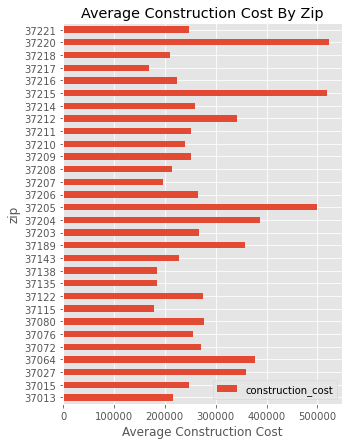

In [109]:
fig, ax = plt.subplots(figsize=(5, 7))
construction_avg.plot(kind='barh', y="construction_cost", x="zip", ax=ax)
ax.set(title='Average Construction Cost By Zip', xlabel='Average Construction Cost')

In [110]:
construction_dem = pd.merge(construction_avg, demographics_nash, on='zip')

In [111]:
construction_dem = construction_dem.sort_values("construction_cost", ascending = False)

In [112]:
construction_dem

,zip,construction_cost,Total:,Male:,18 and 19 years,20 years,21 years,22 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 and 61 years,62 to 64 years,65 and 66 years,67 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,Female:,18 and 19 years,20 years,21 years,22 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 and 61 years,62 to 64 years,65 and 66 years,67 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over
28,37220,522454.411765,5880,2994,20,0,0,22,66,210,257,137,111,275,212,131,111,114,119,99,125,102,31,2886,99,0,0,76,45,194,311,160,143,255,231,138,148,47,80,78,141,79,128
24,37215,519486.596364,22379,9989,179,33,165,410,458,570,507,594,697,892,675,261,386,299,365,592,419,350,283,12390,67,205,129,586,894,795,699,688,735,779,848,460,427,323,351,698,520,351,584
15,37205,500126.269430,23790,10824,176,155,118,249,949,763,612,709,631,780,843,364,446,278,318,626,420,280,375,12966,167,78,123,771,1135,688,688,652,694,768,1018,409,497,363,578,650,452,437,741
14,37204,387631.080569,15452,6908,434,172,108,349,968,708,553,455,332,319,392,153,153,140,87,141,64,32,59,8544,618,266,309,481,1253,893,548,391,359,423,361,177,193,126,164,188,144,54,75
3,37064,377426.000000,58937,27951,790,475,210,743,1169,1501,2224,1824,2122,2099,1980,823,1126,684,802,943,610,431,293,30986,623,319,149,926,1724,1714,1867,2181,2353,2232,2365,998,1166,798,731,1279,816,590,769
2,37027,360214.687204,56117,27888,673,179,263,1177,1154,1012,1428,2181,2122,1916,2070,829,1156,459,1046,1062,604,302,319,28229,507,210,226,1057,879,1264,1769,1958,2496,2043,2311,770,1086,786,892,1145,748,538,280
12,37189,356748.181818,4016,1642,16,0,0,13,96,91,218,117,84,66,93,104,72,68,28,111,69,50,0,2374,22,11,0,38,256,141,293,171,117,159,177,83,79,87,47,134,27,47,54
22,37212,342385.351064,20803,9757,1424,579,468,811,1140,924,450,548,443,202,408,130,316,142,191,174,66,53,32,11046,1855,768,713,1142,1316,742,451,359,406,354,446,220,157,179,103,188,101,80,232
6,37080,277918.931818,7394,3703,63,17,6,141,263,110,235,205,394,235,370,121,266,180,202,93,159,69,41,3691,129,29,34,90,230,166,86,187,339,324,490,73,162,56,192,135,115,64,81
8,37122,275976.666667,58323,29256,609,256,331,801,1416,1585,1958,2389,2525,1898,1951,800,778,749,897,1065,812,264,184,29067,526,267,126,818,1620,1925,1965,2373,2349,2020,2011,705,1138,772,976,1251,654,464,289


In [113]:
construction_avgcost_dem = construction_dem[['zip','construction_cost','Total:','Male:', 'Female:']]

In [114]:
construction_avgcost_dem = construction_avgcost_dem.reset_index()
construction_avgcost_dem.drop(columns = 'index')

,zip,construction_cost,Total:,Male:,Female:
0,37220,522454.411765,5880,2994,2886
1,37215,519486.596364,22379,9989,12390
2,37205,500126.269430,23790,10824,12966
3,37204,387631.080569,15452,6908,8544
4,37064,377426.000000,58937,27951,30986
5,37027,360214.687204,56117,27888,28229
6,37189,356748.181818,4016,1642,2374
7,37212,342385.351064,20803,9757,11046
8,37080,277918.931818,7394,3703,3691
9,37122,275976.666667,58323,29256,29067


In [115]:
construction_complete_dt = pd.merge(zip_count, construction_avgcost_dem, on='zip')

In [116]:
construction_complete_dt

,zip,permits_issued,index,construction_cost,Total:,Male:,Female:
0,37013,1577,0,216590.251744,97939,47658,50281
1,37209,1382,19,251972.737337,38664,18251,20413
2,37207,804,17,197090.493781,39544,17866,21678
3,37208,686,18,214088.938776,18011,7917,10094
4,37076,530,5,254506.398113,40161,19600,20561
5,37206,462,16,264748.136364,26382,12473,13909
6,37135,400,9,184345.097500,14256,6919,7337
7,37138,310,10,185427.319355,23784,11320,12464
8,37216,304,25,223912.282895,17848,8877,8971
9,37211,302,21,251122.804636,75955,39340,36615


In [117]:
construction_avgcost_dem.to_csv('construction_avg_demographics.csv')

In [118]:
construction_companies = residential_nash_clean[['construction_cost', 'zip','contact']]

In [119]:
construction_bizz = construction_companies.groupby(["zip", "contact"])["construction_cost"].mean().reset_index()

In [120]:
construction_bizz.head()

,zip,contact,construction_cost
0,37013,"AHMED, OMER",405540.000000
1,37013,AMH DEVELOPMENT TENNESSEE GC LLC,268032.835821
2,37013,"BENCHMARK COMMUNITIES, LLC",236194.714286
3,37013,BGT CONSTRUCTION LLC,241071.000000
4,37013,BUILD TRUST HOMES LLC,261350.500000


In [121]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [122]:
construction_count = construction_companies.groupby(["zip", "contact"])["construction_cost"].count().reset_index()

In [123]:
construction_count.head()

,zip,contact,construction_cost
0,37013,"AHMED, OMER",1
1,37013,AMH DEVELOPMENT TENNESSEE GC LLC,67
2,37013,"BENCHMARK COMMUNITIES, LLC",21
3,37013,BGT CONSTRUCTION LLC,1
4,37013,BUILD TRUST HOMES LLC,2


In [124]:
dates = residential_nash_clean[['date_entered','date_issued', 'city']]

In [125]:
dates

,date_entered,date_issued,city
0,3/17/2021,5/5/2021,MADISON
1,3/17/2021,5/5/2021,MADISON
2,3/17/2021,5/5/2021,MADISON
3,3/17/2021,5/5/2021,MADISON
4,3/17/2021,5/5/2021,MADISON
...,...,...,...
9173,2/12/2020,2/21/2020,ANTIOCH
9174,11/14/2019,11/20/2019,NASHVILLE
9175,6/30/2020,9/8/2020,NASHVILLE
9176,12/22/2020,2/4/2021,NASHVILLE


In [126]:
dates['date_entered'] = pd.to_datetime(dates['date_entered'])


<ipython-input-126-7aa1d29a5983>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['date_entered'] = pd.to_datetime(dates['date_entered'])


In [127]:
dates['date_issued'] = pd.to_datetime(dates['date_issued'])

<ipython-input-127-1fb4b653803d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['date_issued'] = pd.to_datetime(dates['date_issued'])


In [128]:
dates['date_issued'].dt.year

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
9173    2020
9174    2019
9175    2020
9176    2021
9177    2019
Name: date_issued, Length: 9178, dtype: int64

In [129]:
construction_by_city = dates.groupby(["date_issued"])["date_issued"].count()

In [130]:
construction_by_city

date_issued
2018-05-24    22
2018-05-25     4
2018-05-29    26
2018-05-30    19
2018-05-31     8
              ..
2021-05-21    15
2021-05-24    10
2021-05-25    17
2021-05-26    30
2021-05-27    16
Name: date_issued, Length: 752, dtype: int64

In [131]:
#construction_by_city.groupby([pd.Grouper(freq="A"), "date_issued"]).sum()